In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("matches.csv")
df
d=pd.read_csv("deliveries.csv")
d


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


1) Number of matches

In [63]:
print(df["season"].value_counts()[2008])

58


2) City for minimum and maximum matches

In [64]:
df["city"].value_counts().idxmax()


'Mumbai'

In [65]:
df["city"].value_counts().idxmin()

'Bloemfontein'

3) Total count of matches city wise.

In [66]:
df["city"].value_counts(ascending=True)

Bloemfontein        2
East London         3
Nagpur              3
Kimberley           3
Kanpur              4
Kochi               5
Raipur              6
Sharjah             6
Cape Town           7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Johannesburg        8
Dharamsala          9
Indore              9
Rajkot             10
Mohali             10
Ahmedabad          12
Centurion          12
Visakhapatnam      13
Bengaluru          14
Durban             15
Pune               38
Chandigarh         46
Jaipur             47
Chennai            57
Hyderabad          64
Bangalore          66
Delhi              74
Kolkata            77
Mumbai            101
Name: city, dtype: int64

4) Maxm and Minm Toss winner

In [67]:
df["toss_winner"].value_counts().idxmax()

'Mumbai Indians'

In [68]:
df["toss_winner"].value_counts().idxmin()

'Rising Pune Supergiant'

5) Toss decision that the team has taken.

In [69]:
df[["toss_winner","toss_decision"]]

,toss_winner,toss_decision
0,Royal Challengers Bangalore,field
1,Rising Pune Supergiant,field
2,Kolkata Knight Riders,field
3,Kings XI Punjab,field
4,Royal Challengers Bangalore,bat
...,...,...
751,Mumbai Indians,field
752,Chennai Super Kings,bat
753,Delhi Capitals,field
754,Chennai Super Kings,field


6) Total number of normal and tie matches.

In [70]:
print(df["result"].value_counts()["normal"])

743


In [71]:
print(df["result"].value_counts()["tie"])

9


7) Team names where the match result is tie.

In [72]:
df.loc[df["result"]=="tie",["team1","team2"]]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab
705,Kolkata Knight Riders,Delhi Capitals
746,Mumbai Indians,Sunrisers Hyderabad


8) Team name who won the match by highest runs.

In [73]:
df.loc[df["win_by_runs"]==df["win_by_runs"].max(),"winner"]

43    Mumbai Indians
Name: winner, dtype: object

9) Team name who won the match by lowest runs.

In [74]:
df.loc[df["win_by_runs"]==df["win_by_runs"].min(),"winner"]

1      Rising Pune Supergiant
2       Kolkata Knight Riders
3             Kings XI Punjab
5         Sunrisers Hyderabad
6              Mumbai Indians
                ...          
750           Kings XI Punjab
751            Mumbai Indians
752            Mumbai Indians
753            Delhi Capitals
754       Chennai Super Kings
Name: winner, Length: 419, dtype: object

10) Players who was awarded “Player of the match” more than 3 times.

In [75]:
df["player_of_match"].value_counts()[df["player_of_match"].value_counts()>3]

CH Gayle           21
AB de Villiers     20
RG Sharma          17
MS Dhoni           17
DA Warner          17
                   ..
KL Rahul            4
NM Coulter-Nile     4
F du Plessis        4
MK Pandey           4
N Rana              4
Name: player_of_match, Length: 65, dtype: int64

11) Player who was awarded as player of the match maximum times.

In [91]:
df["player_of_match"].value_counts().idxmax()

'CH Gayle'

12) Venue where the team won the match by highest runs.


In [77]:
df.loc[df["win_by_runs"]==df["win_by_runs"].max(),"venue"]

43    Feroz Shah Kotla
Name: venue, dtype: object

13) Venue where the team won the match by lowest runs.

In [78]:
df.loc[df["win_by_runs"]==df["win_by_runs"].min(),"venue"]

1        Maharashtra Cricket Association Stadium
2         Saurashtra Cricket Association Stadium
3                         Holkar Cricket Stadium
5      Rajiv Gandhi International Stadium, Uppal
6                               Wankhede Stadium
                         ...                    
750                            IS Bindra Stadium
751                             Wankhede Stadium
752                    M. A. Chidambaram Stadium
753                             ACA-VDCA Stadium
754                             ACA-VDCA Stadium
Name: venue, Length: 419, dtype: object

14) Umpires who did umpiring maximum times.

In [95]:
df['umpire1'].value_counts().idxmax()

'HDPK Dharmasena'

In [97]:
df["umpire2"].value_counts().idxmax()

'S Ravi'

In [98]:
df["umpire3"].value_counts().idxmax()

'C Shamshuddin'

15)Total matches played in each season

In [99]:
df["season"].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

16) Total runs in each season

In [110]:
merged=df.merge(d,left_on='id',right_on='match_id')
merged

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [9]:
d=pd.read_csv("deliveries.csv")
match_detail=df[["id","season"]].merge(d, left_on="id",right_on="match_id",how='left')
match_detail.groupby(["season"])["total_runs"].sum().reset_index()

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


17) No. of tosses won by each team.

In [111]:
df["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

18) Visualize the Toss decision across seasons

<AxesSubplot:xlabel='season', ylabel='count'>

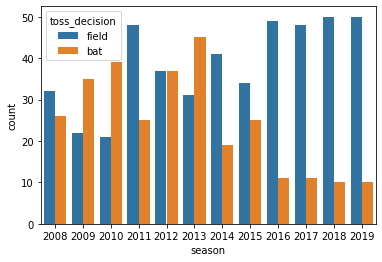

In [123]:
sn.countplot(data=df,x="season",hue="toss_decision")

19) Dismissal Kind and Visualize using best fit graph.

<AxesSubplot:xlabel='dismissal_kind', ylabel='count'>

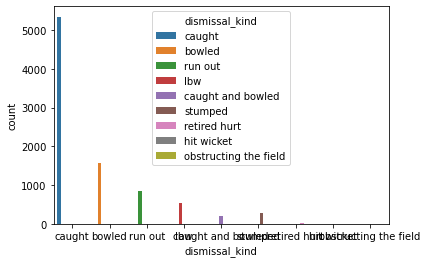

In [121]:
sn.countplot(data=d,x="dismissal_kind",hue="dismissal_kind")

20)  Top 10 run scorers in IPL and Visualize using best fit graph.

In [126]:
a=d.groupby(by="batsman")["total_runs"].sum().sort_values(ascending=False).head(10)
a

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
CH Gayle          4873
RV Uthappa        4703
MS Dhoni          4691
AB de Villiers    4583
G Gambhir         4485
Name: total_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

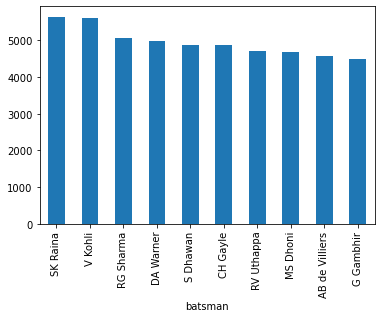

In [127]:
a.plot.bar()

21) Visualize the Highest MOM award winner

<AxesSubplot:>

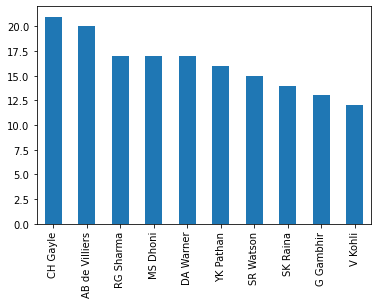

In [129]:
ad=df.player_of_match.value_counts().head(10)
ad.plot.bar()

22)Total Number of Played Matches by each team

In [4]:
total=df["team1"].value_counts()+df["team2"].value_counts()
total

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

24) Distribution of Won the Matches

<AxesSubplot:>

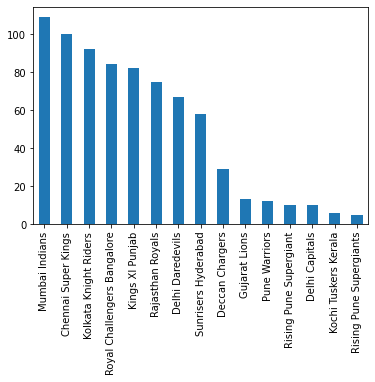

In [5]:
won=df["winner"].value_counts()
pd.DataFrame(won)
won.plot(kind="bar")

25)Ratio between Total Matches and Win Matches

In [6]:
df.loc[df["result"]== "normal"].shape[0] / df.shape[0]

0.9828042328042328

26) Choice of each team after winning the toss

In [7]:
pd.crosstab(df.toss_winner,df.toss_decision)

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,2,8
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,26,55
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,62
Mumbai Indians,44,54
